# Visualization of EventBrite data: maps

In [169]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geopy

In [206]:
# import shapefile of Netherlands provincial boundaries

nederland = gpd.read_file('../data/Provinciegrenzen_2019-shp/Provinciegrenzen_2019.shp')

In [207]:
nederland.head()

,FID,Code,Provincien,SHAPE_Leng,SHAPE_Area,geometry
0,1,20,Groningen,4.307846,0.322941,"MULTIPOLYGON (((6.81394 53.07097, 6.81287 53.0..."
1,2,21,Friesland,7.739758,0.477704,"MULTIPOLYGON (((6.19142 53.41104, 6.19113 53.4..."
2,3,22,Drenthe,3.406998,0.357630,"POLYGON ((6.17140 52.81526, 6.17129 52.81533, ..."
3,4,23,Overijssel,5.461576,0.450281,"MULTIPOLYGON (((6.58105 52.66947, 6.58157 52.6..."
4,5,25,Gelderland,6.976507,0.670796,"MULTIPOLYGON (((5.48394 52.09300, 5.48401 52.0..."


<AxesSubplot:>

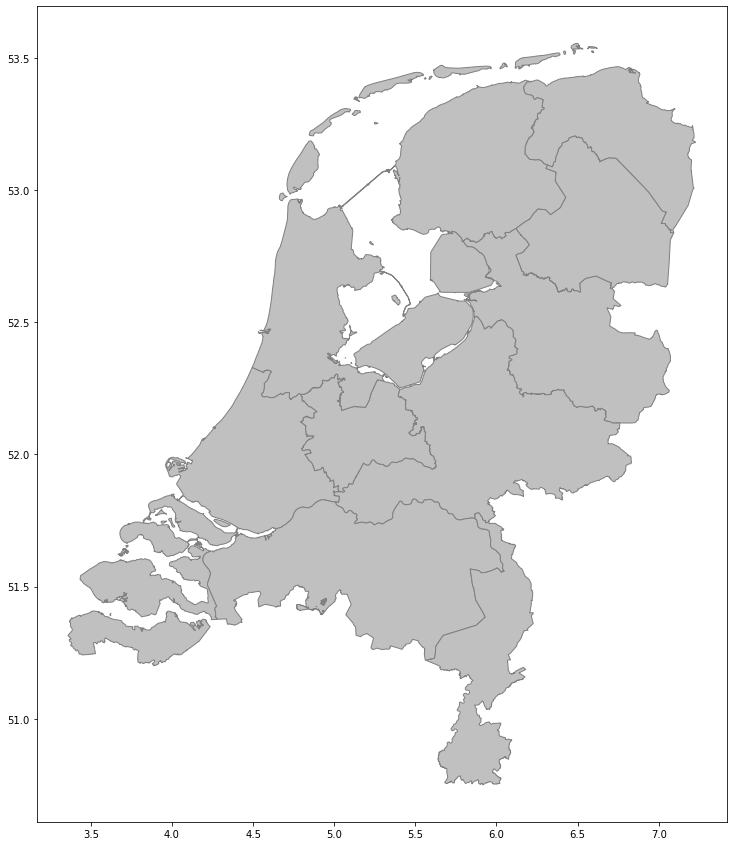

In [208]:
# plot map of Netherlands

nederland.plot(color = 'silver', edgecolor = 'gray')

In [209]:
# import university data

universities = pd.read_csv('../data/universities_geo.csv')
universities.head()

,Unnamed: 0,University,Staff_number,Address,latitude,longitude
0,0,Wageningen University,3247,"Droevendaalsesteeg 4, 6708PB, WAGENINGEN, Nede...",51.986389,5.668009
1,1,Radboud University,3903,"Houtlaan 4, 6525XZ, NIJMEGEN, Nederland",51.816893,5.865491
2,2,University of Groningen,5146,"Broerstraat 5, 9712CP, GRONINGEN, Nederland",53.219246,6.563101
3,3,Maastricht University,4565,"Minderbroedersberg 4, 6211LK, MAASTRICHT, Nede...",50.847129,5.686418
4,4,Open University,668,"Valkenburgerweg 177, 6419AT, HEERLEN, Nederland",50.878702,5.957650


In [210]:
# import universities data as geodataframe

gdf = gpd.GeoDataFrame(universities, geometry = gpd.points_from_xy(universities['longitude'], universities['latitude']))

gdf.head()

,Unnamed: 0,University,Staff_number,Address,latitude,longitude,geometry
0,0,Wageningen University,3247,"Droevendaalsesteeg 4, 6708PB, WAGENINGEN, Nede...",51.986389,5.668009,POINT (5.66801 51.98639)
1,1,Radboud University,3903,"Houtlaan 4, 6525XZ, NIJMEGEN, Nederland",51.816893,5.865491,POINT (5.86549 51.81689)
2,2,University of Groningen,5146,"Broerstraat 5, 9712CP, GRONINGEN, Nederland",53.219246,6.563101,POINT (6.56310 53.21925)
3,3,Maastricht University,4565,"Minderbroedersberg 4, 6211LK, MAASTRICHT, Nede...",50.847129,5.686418,POINT (5.68642 50.84713)
4,4,Open University,668,"Valkenburgerweg 177, 6419AT, HEERLEN, Nederland",50.878702,5.957650,POINT (5.95765 50.87870)


In [211]:
# check datatype

type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [212]:
# check CRS of nederland geo df

print(nederland.crs)

epsg:4326


In [213]:
# assign CRS to gdf

gdf.crs = "EPSG:4326"

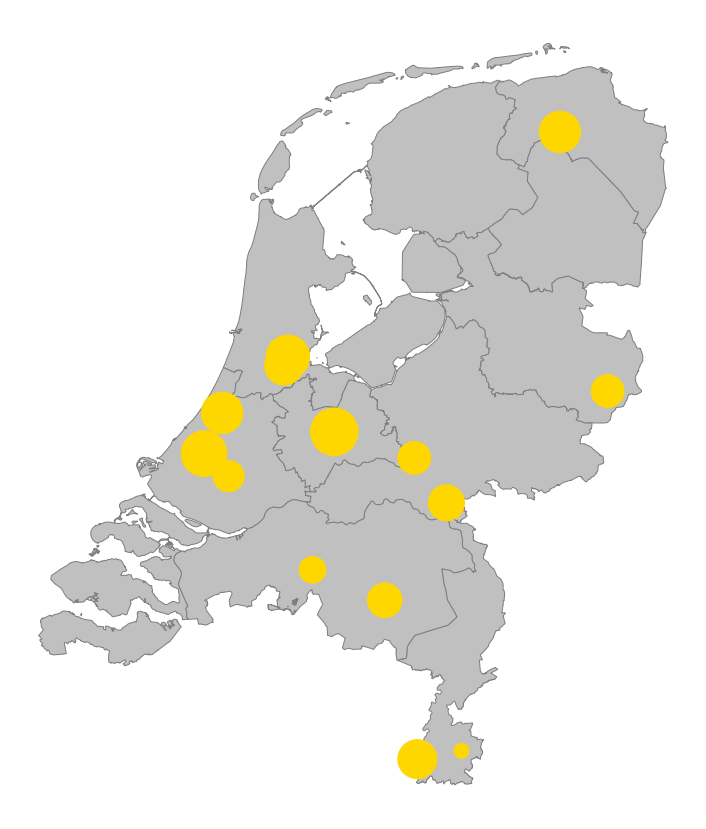

In [214]:
# plot university by size on Netherlands map 

base = nederland.plot(color='silver', edgecolor='gray')
ax = gdf.plot(ax=base, marker='o', color='gold', markersize=gdf['Staff_number']/3)
ax.set_axis_off()



In [215]:
# now make df including event participants per university
# import main data file

df = pd.read_csv("../data/all_event_data.csv")
df.head()

,event,event_date,year,org_id,name,email,affiliation,car1,car2,eSc_collab,...,event_type,event_level,event_focus,ticket_type,order_id,id,event_id,venue_id,uri,affiliation_type
0,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Marco de Vos,devos@astron.nl,ASTRON,NaN,NaN,False,...,eScience Symposium,Other,Other,Regular,520207803,655709628,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
1,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Gert Kruithof,kruithof@astron.nl,ASTRON,NaN,NaN,False,...,eScience Symposium,Other,Other,Early Bird,520781005,656441065,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
2,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Emma Beauxis-Aussalet,emalb@cwi.nl,CENTRUM WISKUNDE & INFORMATICA,NaN,NaN,False,...,eScience Symposium,Other,Other,Student,519898955,655325883,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
3,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Vyacheslav Tykhonov,vyacheslav.tykhonov@dans.knaw.nl,DANS-KNAW,NaN,NaN,False,...,eScience Symposium,Other,Other,Early Bird,520212788,655715811,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,Research Institute
4,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Hanno Spreeuw,h.spreeuw@esciencecenter.nl,ESCIENCE CENTER,NaN,NaN,False,...,eScience Symposium,Other,Other,Regular,520789126,656450646,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,eScience Center


In [216]:
df['affiliation_type'].value_counts()

University                                     522
eScience Center                                101
Research Institute                             100
University Medical Center                       50
Consortium                                      15
Private Company                                 11
University of Applied Sciences / Hogeschool     11
Government Institute                             8
Archive / Museum                                 7
NWO                                              2
Charity                                          2
Name: affiliation_type, dtype: int64

In [217]:
df2 = df[df['affiliation_type'] == 'University']
df2.head()

,event,event_date,year,org_id,name,email,affiliation,car1,car2,eSc_collab,...,event_type,event_level,event_focus,ticket_type,order_id,id,event_id,venue_id,uri,affiliation_type
27,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Ali Hürriyetoglu,a.hurriyetoglu@let.ru.nl,RADBOUD UNIVERSITY NIJMEGEN,NaN,NaN,False,...,eScience Symposium,Other,Other,Student,520022019,655476427,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,University
35,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,salome scholtens,s.scholtens@rug.nl,UNIVERSITY OF GRONINGEN,NaN,NaN,False,...,eScience Symposium,Other,Other,Early Bird,520649502,656275737,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,University
36,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Alberto Gil,a.giljimenez@student.vu.nl,VU AMSTERDAM,NaN,NaN,False,...,eScience Symposium,Other,Other,Student,520398788,655952299,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,University
39,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Duc Le,v.d.le@utwente.nl,UNIVERSITY OF TWENTE,NaN,NaN,False,...,eScience Symposium,Other,Other,Student,519900951,655328265,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,University
40,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00Z,2016,NLeSc,Adrien Melquiond,a.s.j.melquiond@uu.nl,UTRECHT UNIVERSITY,NaN,NaN,False,...,eScience Symposium,Other,Other,Early Bird,520305547,655832826,2.415813e+10,14338260.0,https://www.eventbriteapi.com/v3/events/241581...,University


In [218]:
df3 = pd.DataFrame(df2['affiliation'].value_counts())
df3.reset_index(inplace = True)
df3.rename(columns = {'index': 'University', 'affiliation': 'participants'}, inplace = True)
df3.head(14)

,University,participants
0,TU DELFT,92
1,UVA,83
2,VU AMSTERDAM,57
3,UTRECHT UNIVERSITY,50
4,LEIDEN UNIVERSITY,37
5,WAGENINGEN UNIVERSITY,34
6,UNIVERSITY OF TWENTE,31
7,TU/E,30
8,RADBOUD UNIVERSITY NIJMEGEN,26
9,UNIVERSITY OF GRONINGEN,26


In [219]:
print(list(gdf['University']))

['Wageningen University', 'Radboud University', 'University of Groningen', 'Maastricht University', 'Open University', 'TU Eindhoven', 'Tilburg University', 'University of Amsterdam', 'VU Amsterdam', 'University Twente', 'University Utrecht', 'Erasmus University Rotterdam', 'TU Delft', 'Leiden University']


In [220]:
# change university names so that they match the one in the university df

df3['University'].replace({"TU DELFT": "TU Delft",
                           "UVA": "University of Amsterdam",
                           "VU AMSTERDAM": "VU Amsterdam",
                           "UTRECHT UNIVERSITY": "University Utrecht",
                           "LEIDEN UNIVERSITY": "Leiden University",
                           "WAGENINGEN UNIVERSITY": "Wageningen University",
                           "UNIVERSITY OF TWENTE": "University Twente",
                           "TU/E": "TU Eindhoven",
                           "RADBOUD UNIVERSITY NIJMEGEN": "Radboud University",
                           "UNIVERSITY OF GRONINGEN": "University of Groningen",
                           "MAASTRICHT UNIVERSITY": "Maastricht University",
                           "TILBURG UNIVERSITY": "Tilburg University"},
                           inplace = True)

In [221]:
# now join the dfs

gdf_universities = pd.merge(gdf, df3, on = 'University', how = 'left')
gdf_universities.head()

,Unnamed: 0,University,Staff_number,Address,latitude,longitude,geometry,participants
0,0,Wageningen University,3247,"Droevendaalsesteeg 4, 6708PB, WAGENINGEN, Nede...",51.986389,5.668009,POINT (5.66801 51.98639),34.0
1,1,Radboud University,3903,"Houtlaan 4, 6525XZ, NIJMEGEN, Nederland",51.816893,5.865491,POINT (5.86549 51.81689),26.0
2,2,University of Groningen,5146,"Broerstraat 5, 9712CP, GRONINGEN, Nederland",53.219246,6.563101,POINT (6.56310 53.21925),26.0
3,3,Maastricht University,4565,"Minderbroedersberg 4, 6211LK, MAASTRICHT, Nede...",50.847129,5.686418,POINT (5.68642 50.84713),25.0
4,4,Open University,668,"Valkenburgerweg 177, 6419AT, HEERLEN, Nederland",50.878702,5.957650,POINT (5.95765 50.87870),NaN


In [222]:
type(gdf_universities.geometry)

geopandas.geoseries.GeoSeries

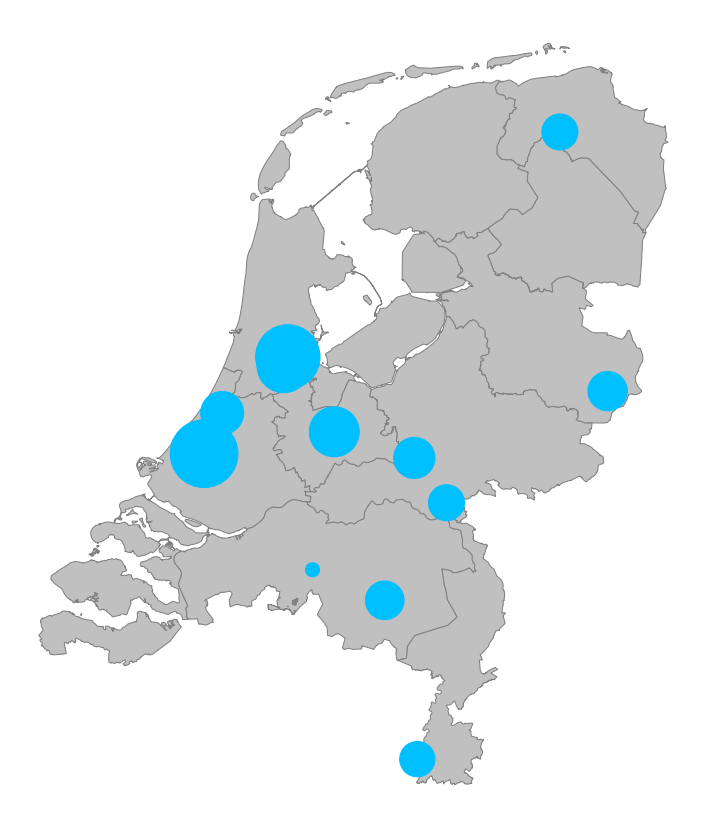

In [225]:
# plot universities sized by event participant number on Netherlands map 

base = nederland.plot(color='silver', edgecolor='gray')
ax = gdf_universities.plot(ax=base, marker='o', color='deepskyblue', markersize=gdf_universities['participants']*50)
ax.set_axis_off()

In [228]:
# make column with participants relative to university size

gdf_universities['participants_rel'] = gdf_universities['participants'] / gdf_universities['Staff_number']
gdf_universities.head()

,Unnamed: 0,University,Staff_number,Address,latitude,longitude,geometry,participants,participants_rel
0,0,Wageningen University,3247,"Droevendaalsesteeg 4, 6708PB, WAGENINGEN, Nede...",51.986389,5.668009,POINT (5.66801 51.98639),34.0,0.010471
1,1,Radboud University,3903,"Houtlaan 4, 6525XZ, NIJMEGEN, Nederland",51.816893,5.865491,POINT (5.86549 51.81689),26.0,0.006662
2,2,University of Groningen,5146,"Broerstraat 5, 9712CP, GRONINGEN, Nederland",53.219246,6.563101,POINT (6.56310 53.21925),26.0,0.005052
3,3,Maastricht University,4565,"Minderbroedersberg 4, 6211LK, MAASTRICHT, Nede...",50.847129,5.686418,POINT (5.68642 50.84713),25.0,0.005476
4,4,Open University,668,"Valkenburgerweg 177, 6419AT, HEERLEN, Nederland",50.878702,5.957650,POINT (5.95765 50.87870),NaN,NaN


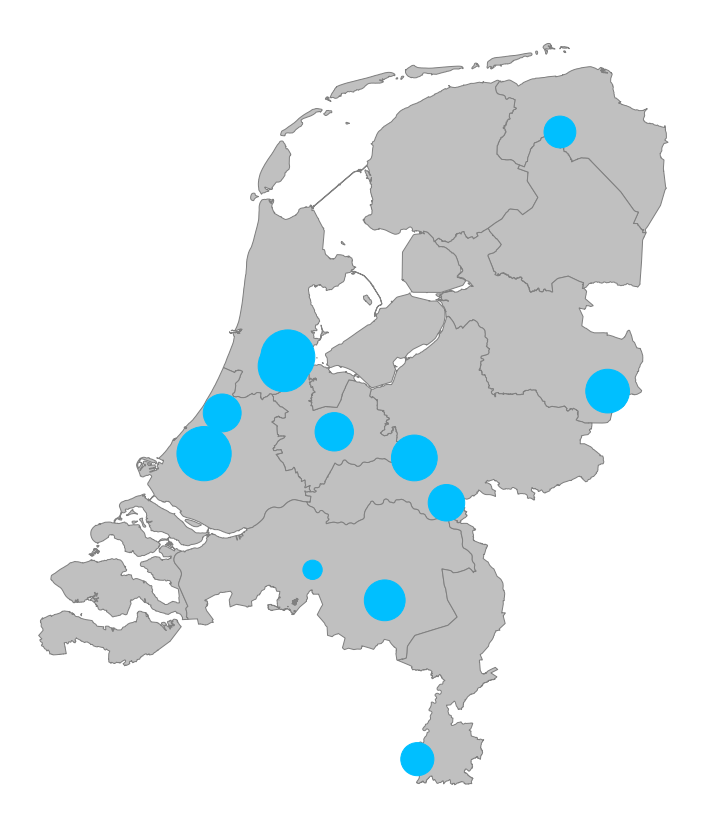

In [233]:
# plot this on the map

base = nederland.plot(color='silver', edgecolor='gray')
ax = gdf_universities.plot(ax=base, marker='o', color='deepskyblue', markersize=gdf_universities['participants_rel']*200000)
ax.set_axis_off()